In [34]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.offline as py
import matplotlib.pyplot as plt

df = pd.read_csv('processed.cleveland.data',names=  ['age','sex','chest_pain','blood pressure','serum_cholestoral','fasting_blood_sugar',\
               'electrocardiographic','max_heart_rate','induced_angina','ST_depression','slope','vessels','thal','diagnosis'])

In [25]:
df.head(5)


,age,sex,chest_pain,blood pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,vessels,thal,diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [26]:
df.describe()


,age,sex,chest_pain,blood pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,diagnosis
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   303 non-null    float64
 1   sex                   303 non-null    float64
 2   chest_pain            303 non-null    float64
 3   blood pressure        303 non-null    float64
 4   serum_cholestoral     303 non-null    float64
 5   fasting_blood_sugar   303 non-null    float64
 6   electrocardiographic  303 non-null    float64
 7   max_heart_rate        303 non-null    float64
 8   induced_angina        303 non-null    float64
 9   ST_depression         303 non-null    float64
 10  slope                 303 non-null    float64
 11  vessels               303 non-null    object 
 12  thal                  303 non-null    object 
 13  diagnosis             303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [28]:
df.isnull().sum()

age                     0
sex                     0
chest_pain              0
blood pressure          0
serum_cholestoral       0
fasting_blood_sugar     0
electrocardiographic    0
max_heart_rate          0
induced_angina          0
ST_depression           0
slope                   0
vessels                 0
thal                    0
diagnosis               0
dtype: int64

In [46]:
(df == '?').sum()

age                     0
sex                     0
chest_pain              0
blood pressure          0
serum_cholestoral       0
fasting_blood_sugar     0
electrocardiographic    0
max_heart_rate          0
induced_angina          0
ST_depression           0
slope                   0
vessels                 4
thal                    2
diagnosis               0
dtype: int64

**Removing the '?' misssing values**

In [47]:
df[df['vessels'] == '?']['vessels']

166    ?
192    ?
287    ?
302    ?
Name: vessels, dtype: object

In [48]:
df[df['thal'] == '?']['thal']

87     ?
266    ?
Name: thal, dtype: object

In [49]:
missing_vessels = df[df['vessels'] == '?']['vessels'].index
missing_thals = df[df['thal'] == '?']['thal'].index

In [50]:
df.drop(missing_vessels,inplace=True)
df.drop(missing_thals,inplace=True)

**After removing 6 missing values**

In [60]:

df

,age,sex,chest_pain,blood pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,vessels,thal,diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


In [53]:
dfa=df.copy()
dfa['sex']=dfa['sex'].map({
    1:'Male',
    0:'Female'
})

In [54]:
px.pie(df, names='diagnosis',color_discrete_sequence=px.colors.sequential.Aggrnyl)

In [55]:
px.pie(df, names='sex',
       color_discrete_sequence=px.colors.sequential.Aggrnyl,
       hole=.4,
       
       )

**Blood Pressure vs Cholestrol**

In [56]:
zero = df[df['diagnosis'] == 0]
one = df[df['diagnosis'] == 1]
two = df[df['diagnosis'] == 2]
three = df[df['diagnosis'] == 3]
four = df[df['diagnosis'] == 4]

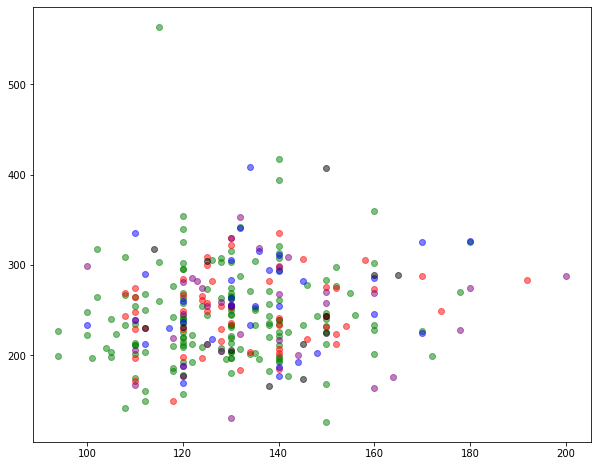

In [57]:
plt.figure(figsize=(10,8))

plt.scatter(zero['blood pressure'], zero['serum_cholestoral'], c='green', alpha=0.5)
plt.scatter(one['blood pressure'], one['serum_cholestoral'], c='red', alpha=0.5)
plt.scatter(two['blood pressure'], two['serum_cholestoral'], c='blue', alpha=0.5)
plt.scatter(three['blood pressure'], three['serum_cholestoral'], c='purple', alpha=0.5)
plt.scatter(four['blood pressure'], four['serum_cholestoral'], c='black', alpha=0.5)
plt.show()

**Checking for age distribution**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



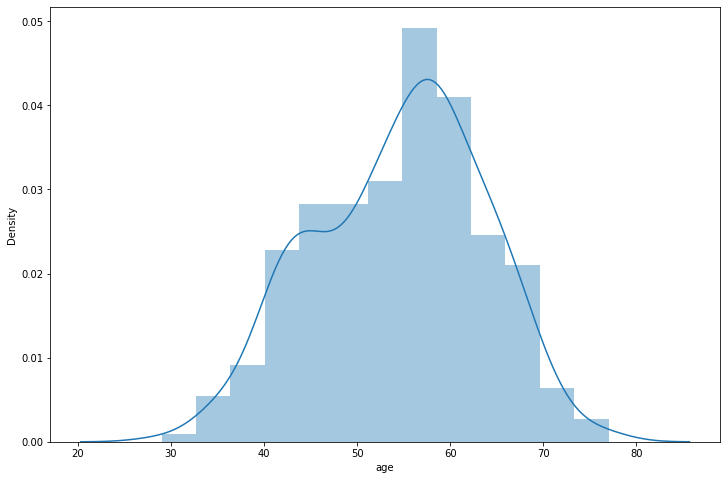

In [61]:
plt.figure(figsize=(12,8))
sns.distplot(df['age'])

**Age range of people with their gender 1: Male 0: Female**

In [62]:
plt.figure(figsize=(10,6))
px.histogram(df,'age',color='sex')

<Figure size 720x432 with 0 Axes>

In [63]:
df['Target'] = df['diagnosis'].apply(lambda x : 1 if x >= 1 else 0)

In [64]:
df

,age,sex,chest_pain,blood pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,vessels,thal,diagnosis,Target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1


**Training test Split**

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [65]:
X= df.drop(['diagnosis','Target'],axis=1)
y = df['Target']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**Taking average of 10 training examples**

In [70]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,log_loss

In [71]:
dt_avg = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    clf1 = DecisionTreeClassifier()
    dt_model = clf1.fit(X_train,y_train)
    dt_pred = dt_model.predict(X_test)
    dt_avg.append(accuracy_score(y_test,dt_pred))
    
print('Average Decision Tree Test accuracy:',sum(dt_avg)/10)

Average Decision Tree Test accuracy: 0.72


In [72]:
print(classification_report(y_test,dt_pred))

print(confusion_matrix(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77        35
           1       0.68      0.60      0.64        25

    accuracy                           0.72        60
   macro avg       0.71      0.70      0.70        60
weighted avg       0.71      0.72      0.71        60

[[28  7]
 [10 15]]


In [73]:
print('Log loss for Decision Tree model:',log_loss(y_test,dt_pred))

Log loss for Decision Tree model: 9.78607993159155
